# Projet Data Mining (part 1)

## 1. Analyse et prétraitement des données

### 1.1. Données statiques

#### 1.1.1. Manipulation de dataset

Importation des librairies

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importation et visualisation le contenu du dataset.

In [2]:
def chargerData(path):
    data = []
    with open(path, 'r') as file:
        for line in file  :
            #remove the \n
            line = line[:-1]
            data.append(line.split(','))

    return data
data1 = chargerData('Dataset1.csv')


In [3]:
pd.DataFrame(data1).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
1,138,8.6,560,7.46,0.62,0.7,5.9,0.24,0.31,0.77,8.71,0.11,1.204,0
2,213,7.5,338,7.62,0.75,1.06,25.4,0.3,0.86,1.54,2.89,2.29,1.8232,0
3,163,9.6,718,7.59,0.51,1.11,14.3,0.3,0.86,1.57,2.7,2.03,1.9092,0
4,157,6.8,475,7.64,0.58,0.94,26,0.34,0.54,1.53,2.65,1.82,1.6168,0


**Description globale du dataset:**


**Description du chaque attribut**

#### 1.1.2. Analyse des caractéristiques des attributs du dataset 

In [4]:
# classify the data
def classifyData(data):
    #exclude the first line

    newData = np.array(data).T
    structured_data = {}
    for line in newData:
        structured_data[line[0]] = []
        structured_data[line[0]] = line[1:]
    
    return structured_data 

attr_data = classifyData(data1)
# print(data1.shape)

In [5]:
pd.DataFrame(attr_data).head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,138,8.6,560,7.46,0.62,0.7,5.9,0.24,0.31,0.77,8.71,0.11,1.204,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.3,0.86,1.54,2.89,2.29,1.8232,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.3,0.86,1.57,2.7,2.03,1.9092,0
3,157,6.8,475,7.64,0.58,0.94,26,0.34,0.54,1.53,2.65,1.82,1.6168,0
4,270,9.9,444,7.63,0.4,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1.4792,1


* Mesures de tendance centrale

In [6]:

def get_actual_value(i):
    if i.isdigit():
        i  = int(i)
        return i
    else:
            try :
                i = float(i)
                return i
            except ValueError:
                print(i)
                return None
def filter_data(data):
    filtered_data = np.array([])
    for item in data:
        item = get_actual_value(item)
        if item != None:
            filtered_data = np.append(filtered_data, item)
    return filtered_data
def moyenne(data):
    dataSize = len(data)
    sum = 0
    for i in data:
        sum += i
    return sum/dataSize
def mediane(data):
    sortedData = np.sort(data)
    middle_elements = 0
    if len(sortedData) %2 == 0:
        middle_elements = sortedData[int(len(sortedData) / 2) - 1 : int(len(sortedData) / 2) + 1]
        middle_elements = (middle_elements[0]+middle_elements[1])/2
    else :
        middle_elements = sortedData[int((len(sortedData)+1) / 2)]
    return middle_elements

def mode(data):
    counts = []
    unique = np.unique(data)
    for i in range(len(unique)) :
        count = 0
        for j in range(1, len(data)):
            if data[i] == data[j]:
                count += 1
        counts.append(count)   
    occurence = 0
    max = 0
    mod = 0
    for count in counts :
        if max < count : 
            max = count
            mod = data[counts.index(count)]

            occurence= 0
        elif max == count :
            occurence +=1
    
    return mod


In [7]:

def compare(mean,median, mod):
    if abs(mean - median) < 0.1 and abs(mean - mod) <0.1:
        return "Symmetric"
    elif mod < median and median < mean:
        return "Positive"
    else:
        return "Negative"
def tendanceCentrale(data):
    trends = np.array([])
    trends = np.append(trends, np.array(['','moyenne','mediane','mode', 'symtrie']))
    for key in data.keys():
        col = np.array([key])
        mean = moyenne(data[key])
        med = mediane(data[key])
        mod = mode(data[key])
        col = np.append(col, mean)
        col = np.append(col, med)
        col = np.append(col, mod)
        col = np.append(col, compare(mean, med, mod))
        trends = np.append(trends, col)
    return trends.reshape(-1,5 ).T
    # return trends
    
# print(attr_data['N'])
for key in attr_data.keys():
    attr_data[key] = filter_data(attr_data[key])
trends = tendanceCentrale(attr_data)
pd.DataFrame(trends)

?
?
NA



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
1,moyenne,246.99774011299436,14.555266138165337,501.33898305084745,7.511954802259897,0.5439209039548021,0.6178167420814461,7.545807909604521,0.4687231638418072,4.1267570621469005,0.9520022624434387,8.653615819209053,0.5934237288135585,1.0637179661016964,0.592090395480226
2,mediane,257.0,8.1,475.0,7.5,0.55,0.59,6.64,0.36,3.56,0.93,8.35,0.42,1.0148,1.0
3,mode,207.0,8.3,444.0,7.5,0.53,0.78,5.13,0.28,6.32,1.25,7.54,0.34,1.3416,0.0
4,symtrie,Negative,Negative,Positive,Symmetric,Symmetric,Negative,Positive,Positive,Negative,Negative,Positive,Positive,Negative,Negative


*  boîte à moustache et afficher les données aberrantes.

In [8]:
def quartile(data):
    # data = filter_data(data)
    q0= np.min(data)
    q2=mediane(data)
    q4 = np.max(data)
    nq1 = int(0.25 * len(data))
    nq3 = int(0.75 * len(data))
    sorted = np.sort(data)
    q1 = sorted[nq1]
    q3 = sorted[nq3]
    return q0,q1,q2,q3,q4
def boxPlot(data, title):
    #calculer les quartiles
    q0,q1,q2,q3,q4 = quartile(data)
    #calculer outliers
    iqr = (q3-q1)
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    new_data = np.array([])
    mean = moyenne(data)
    for i in data:
        if i < lower_bound or i > upper_bound :
            #remove the outlier from the data
            continue
        else:
            new_data = np.append(new_data,i)
    return new_data
def boxPlots(data):
    plot_d = data
    fig, axs = plt.subplots(2, 7)
    
    fig.set_figheight(15)
    fig.set_figwidth(30)
    i = 0
    j=0
    for key in plot_d.keys():
        plot_d[key] = boxPlot(data[key], key)
        axs[i][j].boxplot(plot_d[key])
        axs[i][j].set_title(key)
        j+=1
        if j == 7:
            i+=1
            j=0

    #plot all the boxplots in one row
    # for key in data.keys():
    plt.show()

?
?
NA



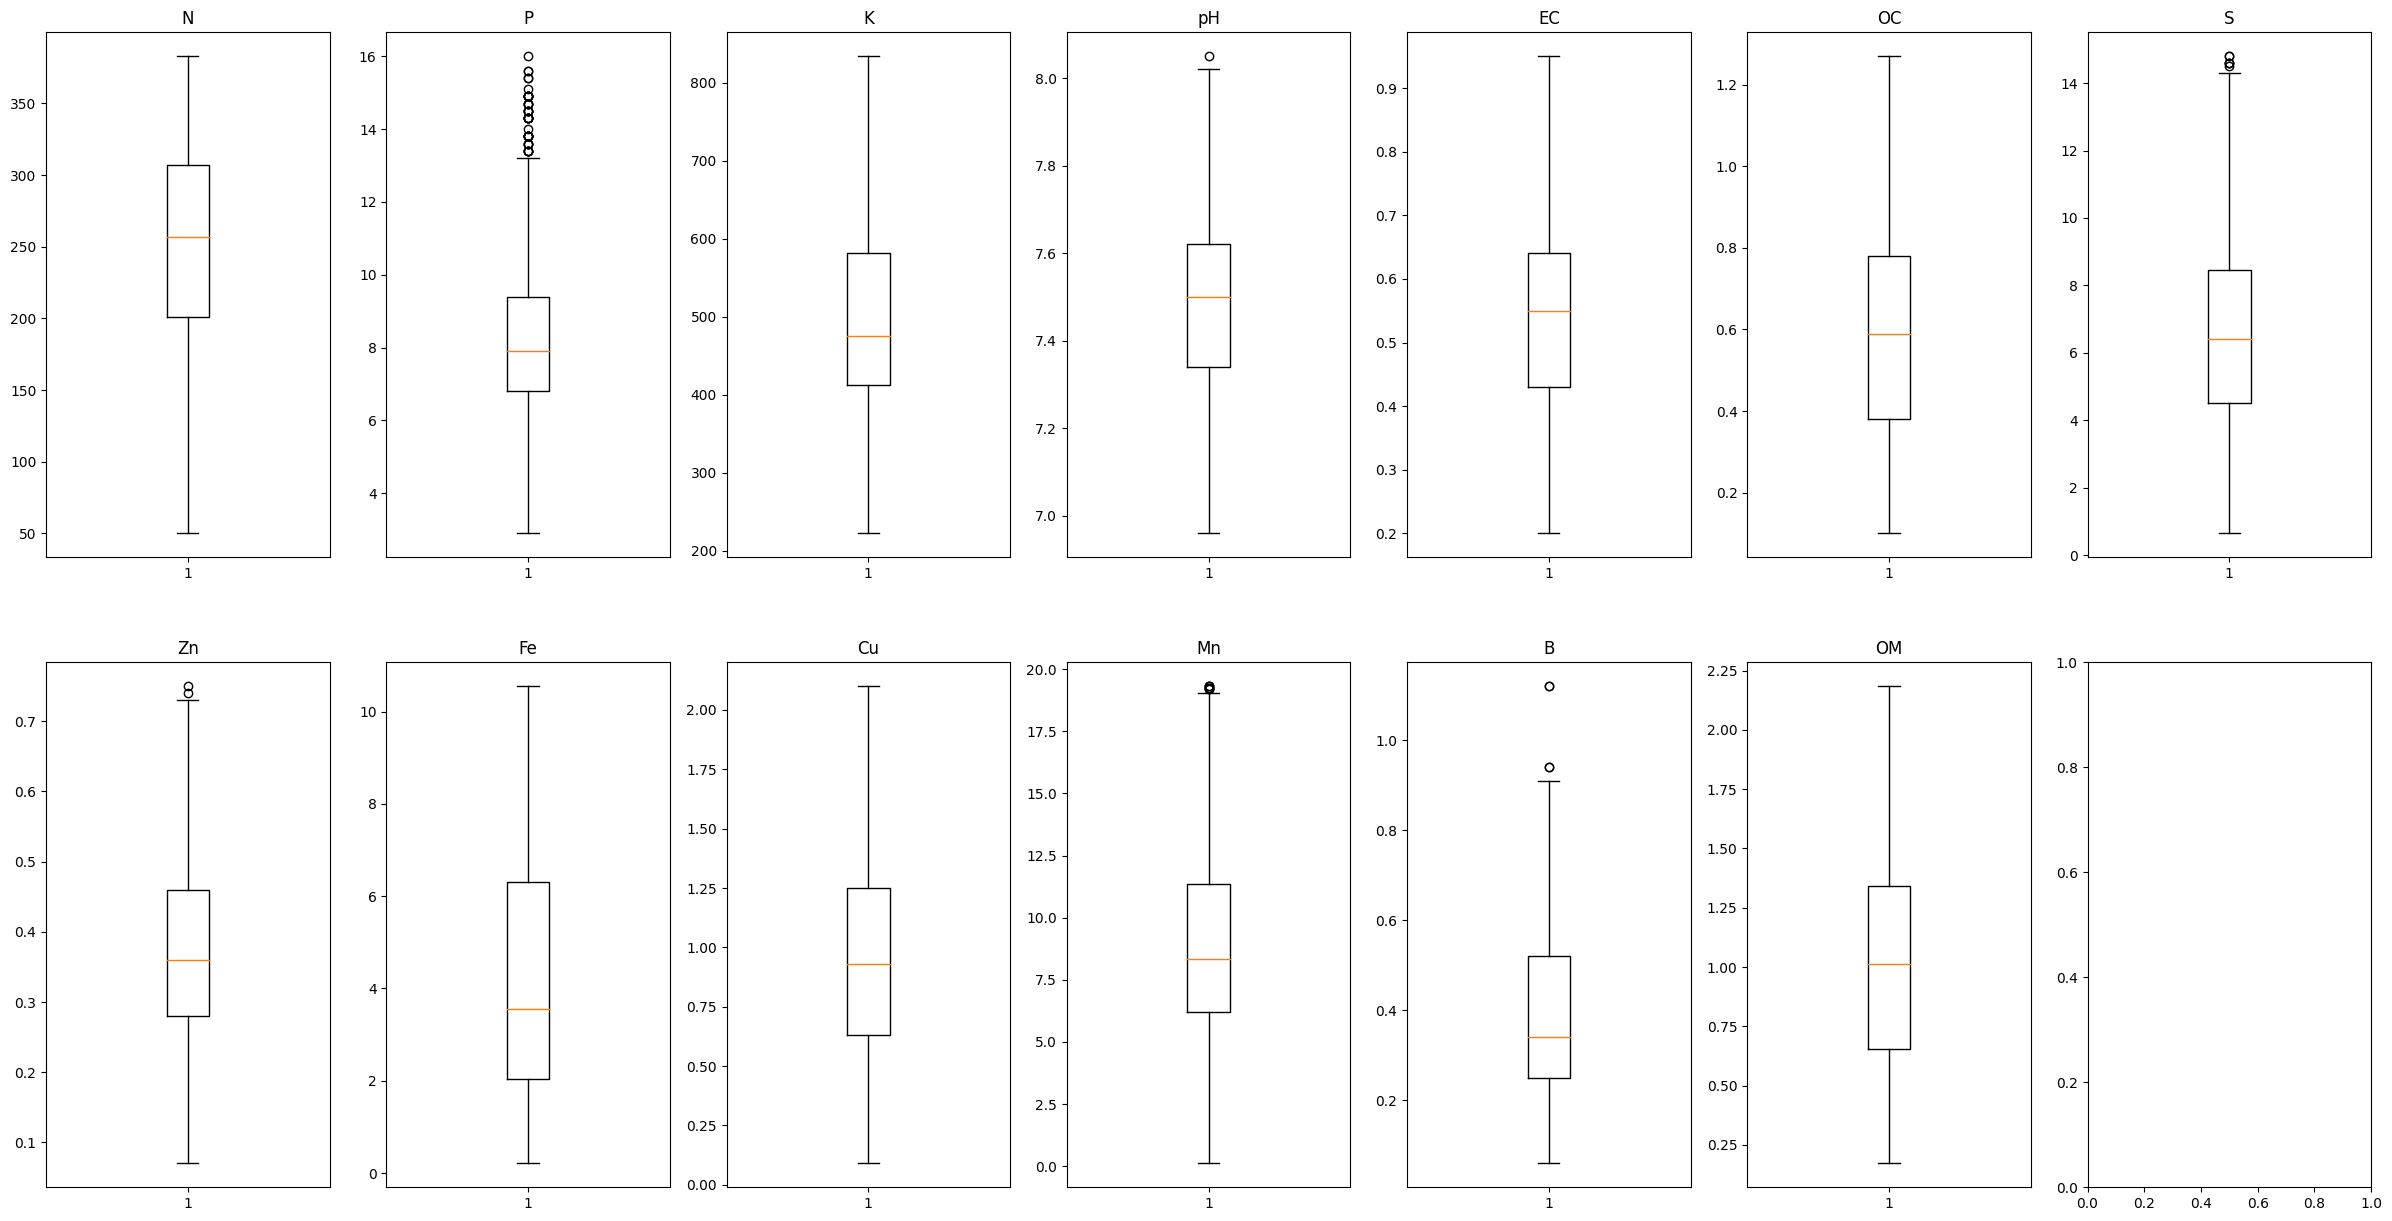

In [9]:
plot_data = classifyData(data1)
#remove the last key
plot_data.pop('Fertility')
for key in plot_data.keys():
    plot_data[key] = filter_data(plot_data[key])
boxPlots(plot_data)

* Construction d'un histogramme et visualisation de la distribution des données.


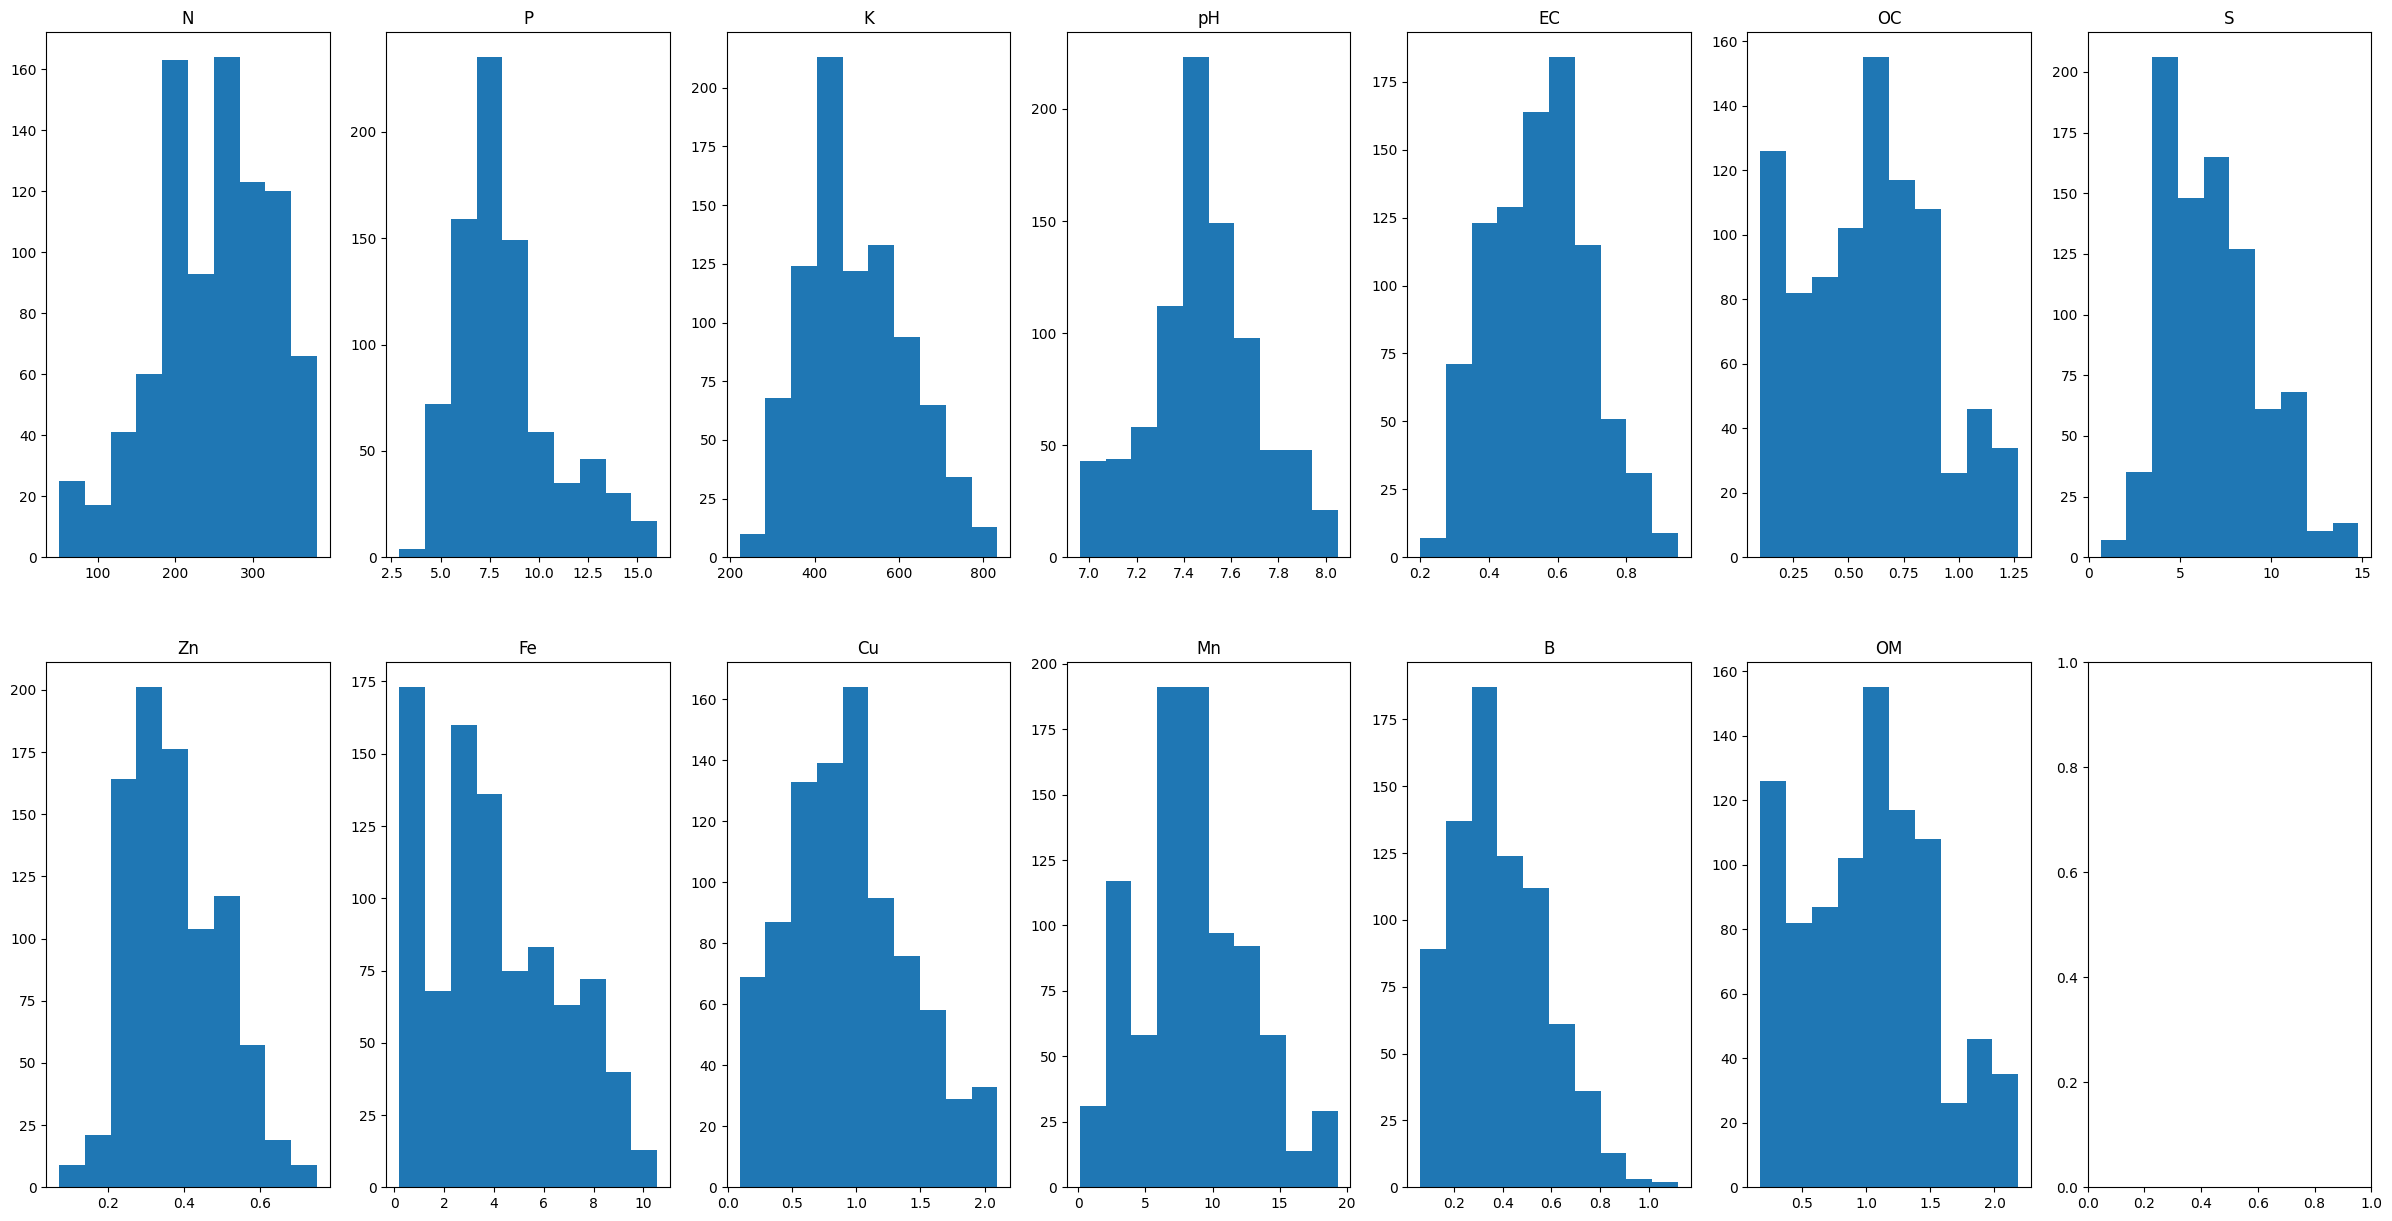

In [10]:
def histogram(data,title):
    
    plt.title(title)
    plt.hist(data)
    plt.show()
def display_histograms(data):
    plot_data = data
    #split the plot into 3 rows
    x = len(data.keys())//2
    fig, axs = plt.subplots(2,7)
    fig.set_figheight(15)
    fig.set_figwidth(30)
    i = 0
    j = 0
    for key in plot_data.keys():
        # plot_data[key] = filter_data(data[key])
        axs[i][j].hist(plot_data[key])
        axs[i][j].set_title(key)
        j += 1
        if j == 7:
            j = 0
            i += 1

    #plot all the boxplots in one row
    # for key in data.keys():
    plt.show()
display_histograms(plot_data)
# histogram(plot_data['N'],'N')

* Les diagrammes de dispersion

/tmp/ipykernel_3541/3022894218.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = plot_data.corr()


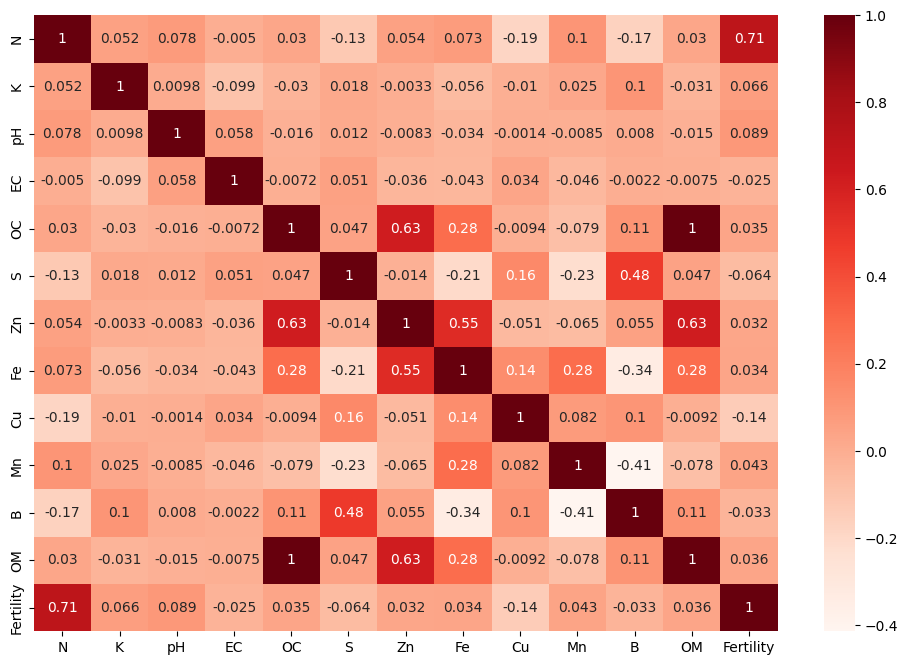

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


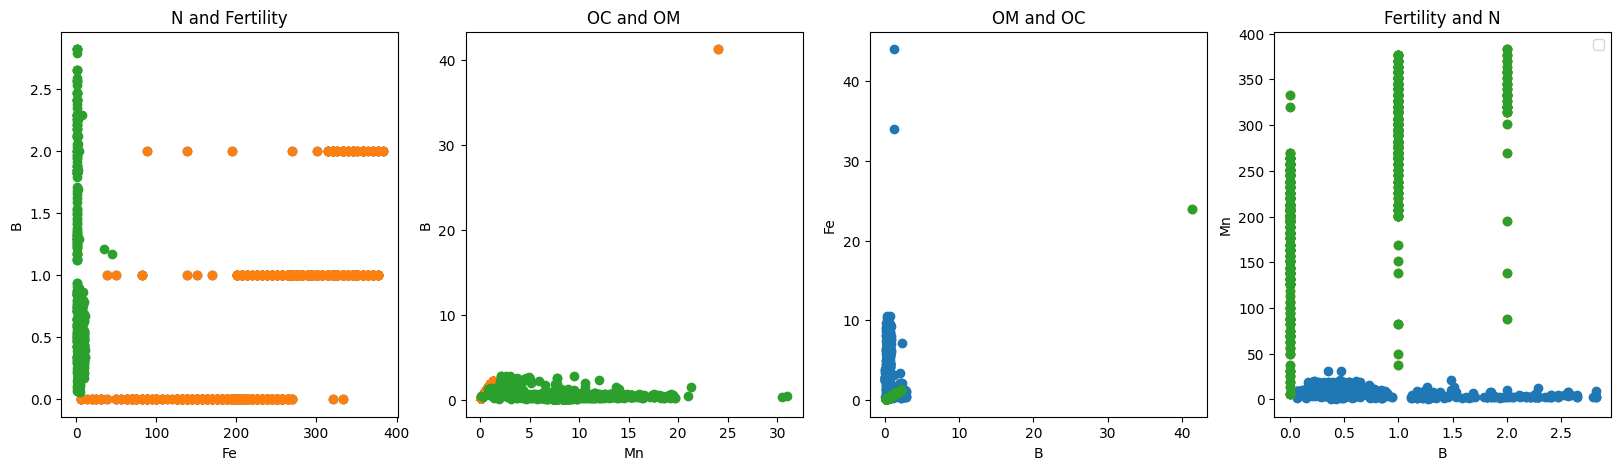

In [35]:
from itertools import combinations
import seaborn as sns
#plot the scatter plot for all attributes

df = pd.read_csv('Dataset1.csv')
#correlation matrix
def correlationMatrix(data):
    plot_data = data
#     for key in plot_data.keys():
#         plot_data[key] = filter_data(plot_data[key])
    plot_data = pd.DataFrame(plot_data)
    corr = plot_data.corr()
    #get two different max correlation values and two min correlation values and with their keys and two in the middle
    max_corr = [0,0]
    min_corr = [0,0]
    used_keys = []
    for key in corr.keys():
        for key2 in corr.keys():
            if key != key2:
                if corr[key][key2] > max_corr[0] and corr[key][key2] not in max_corr and corr[key][key2] not in min_corr:
                    max_corr[1] = max_corr[0]
                    max_corr[0] = corr[key][key2]
                elif corr[key][key2] > max_corr[1] and corr[key][key2] not in max_corr and corr[key][key2] not in min_corr:
                    max_corr[1] = corr[key][key2]
                elif corr[key][key2] < min_corr[0] and corr[key][key2] not in max_corr and corr[key][key2] not in min_corr:
                    min_corr[1] = min_corr[0]
                    min_corr[0] = corr[key][key2]
                elif corr[key][key2] < min_corr[1] and corr[key][key2] not in max_corr and corr[key][key2] not in min_corr:
                    min_corr[1] = corr[key][key2]
    return corr, max_corr, min_corr
def plot_correlation_matrix(corr,min_corr,max_corr):
    #plot the correlation heatmap with dispersion of the max and min correlation values
    plt.figure(figsize=(12,8))
    sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
    plt.show()
    #plot the scatter plot of the max and min correlation values with their keys, in the same subplot
    fig, axs = plt.subplots(1,4)
    fig.set_figheight(5)
    fig.set_figwidth(20)
    i = 0
    j = 0
    for key in corr.keys():
        for key2 in corr.keys():
            if key != key2:
                if corr[key][key2] == max_corr[0] or corr[key][key2] == max_corr[1]:
                    #plot the titles in the axis
                    axs[i].scatter(df[key], df[key2])
                    axs[i].xaxis.set_label_text(key)
                    axs[i].yaxis.set_label_text(key2)
                    i += 1
                elif corr[key][key2] == min_corr[0] or corr[key][key2] == min_corr[1]:
                    axs[j].scatter(df[key], df[key2])
                    axs[j].xaxis.set_label_text(key)
                    axs[j].yaxis.set_label_text(key2)
                    # axs[j].set_title(key + ' and ' + key2)
                    j += 1

    plt.legend()
    plt.show()


corr, min_corr, max_corr = correlationMatrix(df)
plot_correlation_matrix(corr, min_corr, max_corr)

#### 1.1.3. Prétraitement des données

1 . Traitement des données aberrantes

a. methode de remplacement des valeurs manquantes

- Remplacement par l'arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeRegressor
c_data = classifyData(data1)

In [ ]:
#seperate the data that is missing
def seperate_missing_values(data):
    missing_data = {}
    for key in data.keys():
        missing_data[key] = []
        for i in range(len(data[key])):
            #check if any value isn't a digit
            try :
                x = float(data[key][i])
            except ValueError:
                print(data[key][i])
                missing_data[key].append(i)
    return missing_data


def replace_missing_values(data_col,labels,missing_data):
    #prepare the labels
    to_predict = np.array([])
    c = 0
    for i in missing_data:
        to_predict = np.append(to_predict,labels[i+c])
        labels = np.delete(labels, i+c)
        data_col = np.delete(data_col,i+c)
        c-=1
        #applying the decision tree clasiifier
    tree = DecisionTreeRegressor()
    labels = labels.reshape(-1,1)
    data_col = data_col.ravel()
    tree.fit(labels,data_col)
    to_predict = to_predict.reshape(-1,1)
        
    res = tree.predict(to_predict)
    return res  
def replace_missing_values_all(data,missing_data):
    labels = data.pop('Fertility')
    new_data = data
    for key in data.keys():
        if len(missing_data[key])>0:
            x = 0
            for i in missing_data[key]:
                new_data[key][i] = replace_missing_values(new_data[key],labels,missing_data[key])[x]
                x+=1
    #add the labels back to the data
    new_data['Fertility'] = labels
    return new_data

In [ ]:
missing_data = seperate_missing_values(c_data)
clear_data = replace_missing_values_all(c_data,missing_data)
pd.DataFrame(clear_data).head()

b. methode de traitement des valeurs abbérantes

* traitement par regression 

In [ ]:
from sklearn.linear_model import LinearRegression
treat_data = clear_data
for key in treat_data.keys():
    treat_data[key] = filter_data(treat_data[key])
# pd.DataFrame(clear_data)

In [ ]:
def seperate_abberant_data(data, label):
    abberant_data = []
    new_data =np.array([])
    new_label =np.array([]) 
    q0,q1,q2,q3,q4 = quartile(data)
    iqr = (q3-q1)
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in range(len(data)):
        if data[i] < lower_bound or data[i] > upper_bound:
            abberant_data.append(int(i))
        else:
            new_data = np.append(new_data,data[i])
            new_label = np.append(new_label,label[i])
    return abberant_data,new_data,new_label

def regression(data,y,abbr):
    #train a regression model
    y= y.reshape(-1,1)
    # data = data.reshape(-1,1)
    abbr = abbr.reshape(-1,1)
    # abb
    model = LinearRegression()
    model.fit(y,data)
    res  = model.predict(abbr)
    return res
    

In [ ]:
replaced_data = {}

for key in treat_data.keys():
    replaced_data[key] = treat_data[key]
    # print(key)
    abbr, train_data,label = seperate_abberant_data(treat_data[key],treat_data['Fertility'])
    # print(len(abbr))
    for i in range(len(abbr)):
        res = regression(train_data,label, treat_data['Fertility'][abbr[i]])
        replaced_data[key][abbr[i]] = res
    
pd.DataFrame(replaced_data)

2 . Reduction des donnees (elimination des attributs redondants verticalement et horizontalement)

In [ ]:
redondant_data = replaced_data

In [ ]:
def remove_redundant_horizontal(data):
    #get the length of one of the lists
    length = len(data['Fertility'])
    #remove the last column
    to_deletei =[]
    to_deletej =[]
    for i in range(length):
        for j in range(length):
            copy = True
            for key in data.keys():
                if data[key][i] != data[key][j] :
                    copy = False
                    break
            if  copy and i != j:
                to_deletej.append(j)
                to_deletei.append(i)
                break
    new_data = data.copy()
    for key in new_data.keys():
        new_data[key] = np.delete(new_data[key],to_deletei)
    return new_data

In [ ]:
redondant_data =remove_redundant_horizontal(redondant_data)

In [ ]:
pd.DataFrame(redondant_data)

In [ ]:
def theta(A,B):
    s = np.sum(A*B)
    n = len(A)
    abar = moyenne(A)
    bbar = moyenne(B)
    return (s - n*abar*bbar)/(n*np.std(A)*np.std(B))

In [ ]:
#import combinations
from itertools import combinations
def remove_redundant_vertical(data):
    keys  = list(data.keys())
    combination = list(combinations(keys,2))
    deleted = []
    for comb in combination:
        if comb[0] not in deleted and comb[1] not in deleted:
            if theta(data[comb[0]],data[comb[1]]) > 0.9 and comb[0] != comb[1] :
                deleted.append(comb[1])

                data.pop(comb[1])
    return data

In [ ]:
redondant_data = remove_redundant_vertical(redondant_data)


In [ ]:
pd.DataFrame(redondant_data)

3. Normalisation des donnees

a. Methode min-max 

In [ ]:
def min_max(new_min, new_max, data):
    new_data = data
    old_min = np.min(new_data)
    old_max = np.max(new_data)
    for i,x in enumerate(data):
       xprime = new_min + ((x-old_min)*(new_max-new_min))/(old_max - old_min)
       new_data[i] = xprime
    return new_data

In [ ]:
min_max_data = replaced_data

In [ ]:
for key in min_max_data.keys():
    min_max_data[key] = min_max(0,1,min_max_data[key])
pd.DataFrame(min_max_data).head()

b. Methode z-score

In [ ]:
z_score_data = replaced_data
def sigma(data):
    s = np.sum(data**2)/len(data)
    s -= moyenne(data)**2
    return np.sqrt(s)

In [ ]:
def z_score(data):
    new_data = data
    mean = moyenne(data)
    sig = sigma(data)
    for i,x in enumerate(data):
        xprime = (x-mean)/sig
        new_data[i] = xprime
    return new_data

In [ ]:
for key in z_score_data.keys():
    z_score_data[key] = z_score(z_score_data[key])
pd.DataFrame(z_score_data).head()